In [1]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-3b6c00f3-9a29-760f-3997-672bd642ba43)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content
!unzip -q '/content/drive/MyDrive/Colab Notebooks/AiffelThon/output.zip'

/content


In [3]:
%%capture
import os
!pip install gdown --upgrade
!pip install opensimplex

%cd /content
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch

#Uninstall new JAX
!pip uninstall jax jaxlib -y
#GPU frontend
!pip install "jax[cuda11_cudnn805]==0.3.10" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
#CPU frontend
#!pip install jax[cpu]==0.3.10
#Downgrade Pytorch
!pip uninstall torch torchvision -y
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html
!pip install timm==0.4.12 ftfy==6.1.1 ninja==1.10.2

## Train model

Below are a series of variables you need to set to run the training. You probably won’t need to touch most of them.

* `dataset_path`: this is the path to your .zip file
* `resume_from`: if you’re starting a new dataset I recommend `'ffhq1024'` or `'./pretrained/wikiart.pkl'`
* `mirror_x` and `mirror_y`: Allow the dataset to use horizontal or vertical mirroring.

In [ ]:
#required: definitely edit these!
dataset_path = '/content/content/stylegan2-ada-pytorch/output'
resume_from = "/content/drive/MyDrive/Colab Notebooks/AiffelThon/jemu/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/results/00017-output-cond-mirror-11gb-gpu-gamma50-kimg4200-bg/network-snapshot-003844.pkl"
aug_strength = 0.094
train_count = 3844
mirror_x = True
#mirror_y = False

#optional: you might not need to edit these
gamma_value = 50.0
augs = 'bg'
config = '11gb-gpu'
snapshot_count = 4

You probably don’t need to run this, but this will update your repo to the latest and greatest.

In [1]:
path = "/content/drive/MyDrive/Colab Notebooks/AiffelThon/jemu/colab-sg2-ada-pytorch/stylegan2-ada-pytorch"

In [ ]:
%cd {path}
!python train.py --gpus=1 --cfg=$config --metrics=None --outdir=./results --data=$dataset_path --snap=$snapshot_count --augpipe=$augs --initstrength=$aug_strength --gamma=$gamma_value --mirror=$mirror_x --mirrory=False --nkimg=$train_count --kimg=4200 --cond=True

In [ ]:
%cd {path}
# !python generate.py --help

In [8]:
pretrained = "'/content/drive/MyDrive/Colab Notebooks/AiffelThon/jemu/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/results/00018-output-cond-mirror-11gb-gpu-gamma50-kimg4200-bg/network-snapshot-003972.pkl'"
path = '/content/drive/MyDrive/Colab Notebooks/AiffelThon/jemu/colab-sg2-ada-pytorch/stylegan2-ada-pytorch'

In [3]:
!rm -rf /content/output & mkdir /content/output
%cd {path}
!python generate.py --outdir=/content/output --seeds=0,3,1234,2022 --class=1 \
      --network={pretrained}

/content/drive/MyDrive/Colab Notebooks/AiffelThon/jemu/colab-sg2-ada-pytorch/stylegan2-ada-pytorch
Loading networks from "/content/drive/MyDrive/Colab Notebooks/AiffelThon/jemu/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/results/00018-output-cond-mirror-11gb-gpu-gamma50-kimg4200-bg/network-snapshot-003972.pkl"...
Generating image for seed 0 (0/4) ...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating image for seed 3 (1/4) ...
Generating image for seed 1234 (2/4) ...
Generating image for seed 2022 (3/4) ...


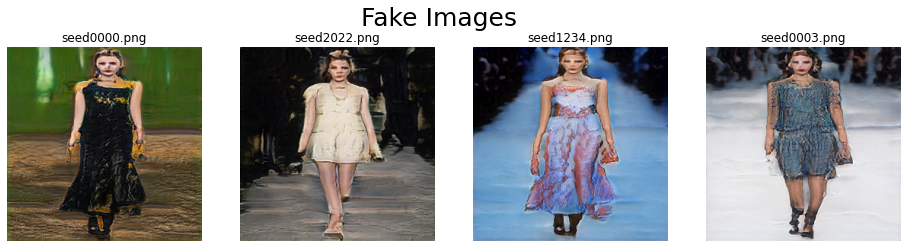

In [4]:
from PIL import Image
import matplotlib.pyplot as plt
import glob

_, ax = plt.subplots(1, 4, figsize=(16, 4))
plt.suptitle('Fake Images', size=25)
for idx, path in enumerate(glob.glob('/content/output/*.png')):
  img = Image.open(path)
  ax[idx].imshow(img)
  ax[idx].axis(False)
  ax[idx].set_title(path.split('/')[-1])
plt.show()

In [21]:
%cd {path}
!python projector.py --help

/content/drive/MyDrive/Colab Notebooks/AiffelThon/jemu/colab-sg2-ada-pytorch/stylegan2-ada-pytorch
Usage: projector.py [OPTIONS]

  Project given image to the latent space of
  pretrained network pickle.

  Examples:

  python projector.py --outdir=out --target=~/mytargetimg.png \
      --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

Options:
  --network TEXT        Network pickle filename
                        [required]

  --target FILE         Target image file to
                        project to  [required]

  --num-steps INTEGER   Number of optimization
                        steps  [default: 1000]

  --seed INTEGER        Random seed  [default:
                        303]

  --save-video BOOLEAN  Save an mp4 video of
                        optimization progress
                        [default: True]

  --outdir DIR          Where to save the output
                        images  [required]

  --help                Show this message a

In [24]:
def project(num):
  path = '/content/project/' + str(num)
  !mkdir {path}
  !python /content/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/projector.py \
      --outdir={path} --target={list_imgs[num]} \
      --network=/content/afhqcat.pkl

In [ ]:
%%capture
!python projector.py --outdir=proj-output --target=~/mytargetimg.png \
      --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl

In [29]:
!python "/content/drive/MyDrive/Colab Notebooks/AiffelThon/jemu/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/style_mixing.py" --help

Usage: style_mixing.py [OPTIONS]

  Generate images using pretrained network
  pickle.

  Examples:

  python style_mixing.py --outdir=out --rows=85,100,75,458,1500 --cols=55,821,1789,293 \
      --network=https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/metfaces.pkl

Options:
  --network TEXT                  Network pickle
                                  filename
                                  [required]

  --rows NUM_RANGE                Random seeds to
                                  use for image
                                  rows  [required]

  --cols NUM_RANGE                Random seeds to
                                  use for image
                                  columns
                                  [required]

  --styles NUM_RANGE              Style layer
                                  range  [default:
                                  0-6]

  --trunc FLOAT                   Truncation psi
                                  [default: 1

In [10]:
import shutil

path_pretrained = '/content/drive/MyDrive/Colab Notebooks/AiffelThon/jemu/stylegan2_face_test/afhqcat.pkl'
shutil.copy(path_pretrained, '/content')

'/content/afhqcat.pkl'

In [13]:
# 0,3,1234,2022
!rm -rf /content/mixing & mkdir /content/mixing
!python "/content/stylegan2-ada-pytorch/style_mixing.py" \
        --outdir=/content/mixing --rows 1234,0 --cols 2022,3 \
        --network={pretrained}

Loading networks from "/content/drive/MyDrive/Colab Notebooks/AiffelThon/jemu/colab-sg2-ada-pytorch/stylegan2-ada-pytorch/results/00018-output-cond-mirror-11gb-gpu-gamma50-kimg4200-bg/network-snapshot-003972.pkl"...
Generating W vectors...
Traceback (most recent call last):
  File "/content/stylegan2-ada-pytorch/style_mixing.py", line 116, in <module>
    generate_style_mix() # pylint: disable=no-value-for-parameter
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 829, in __call__
    return self.main(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 782, in main
    rv = self.invoke(ctx)
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 1066, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/usr/local/lib/python3.7/dist-packages/click/core.py", line 610, in invoke
    return callback(*args, **kwargs)
  File "/content/stylegan2-ada-pytorch/style_mixing.py", line 72, in generate_style_mix
    all

In [16]:
!ls /content/..

bin	 dev   lib32  NGC-DL-CONTAINER-LICENSE	root  sys    var
boot	 etc   lib64  opt			run   tmp
content  home  media  proc			sbin  tools
datalab  lib   mnt    python-apt		srv   usr
